In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import sys
sys.path.insert(1, '/scr/gmachi/prospection/K2/src')

from utils import deserialize, visualize_cell_graph

# Data example

In [45]:
label_path = "/scr/biggest/gmachi/datasets/celldive_lung/processed/label_dict.obj"
label_dict = deserialize(label_path)

In [58]:
label_dict

{1: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 1,
 8: 0,
 10: 0,
 11: 1,
 12: 0,
 13: 1,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 19: 0,
 21: 1,
 22: 0,
 23: 0,
 24: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 1,
 31: 1,
 32: 0,
 35: 0,
 37: 1,
 38: 1,
 39: 0,
 40: 1,
 41: 1,
 42: 1,
 43: 1,
 44: 1,
 45: 1,
 46: 0,
 47: 1,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 1,
 55: 0,
 56: 0,
 57: 1,
 58: 0,
 59: 1,
 60: 0,
 61: 1,
 63: 0,
 64: 1,
 65: 0,
 66: 1,
 67: 0,
 68: 1,
 69: 1,
 70: 0,
 71: 0,
 72: 0,
 73: 1,
 74: 1,
 75: 0,
 76: 1,
 79: 1,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 0,
 85: 1,
 86: 1,
 87: 1,
 88: 1,
 89: 0,
 90: 1,
 91: 1,
 92: 1,
 93: 1,
 94: 0,
 95: 0,
 96: 1,
 97: 1,
 98: 0,
 99: 0,
 100: 0,
 101: 0,
 102: 0,
 103: 1,
 104: 1,
 105: 1,
 106: 1,
 107: 1,
 108: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 1,
 114: 0,
 115: 1,
 116: 0,
 117: 0,
 118: 0,
 119: 0,
 120: 1,
 121: 1,
 122: 0,
 123: 1,
 126: 1,
 127: 0,
 128: 0,
 129: 1,
 130: 0,
 131: 1,
 132: 0,
 133: 0,
 134: 0,
 135: 0,
 137: 1,
 138:

In [59]:
id=7
G = "/scr/biggest/gmachi/datasets/celldive_lung/for_ml/for_prospect/S" + str(id) + ".obj"
G = deserialize(G)

In [60]:
label_dict[id]

1

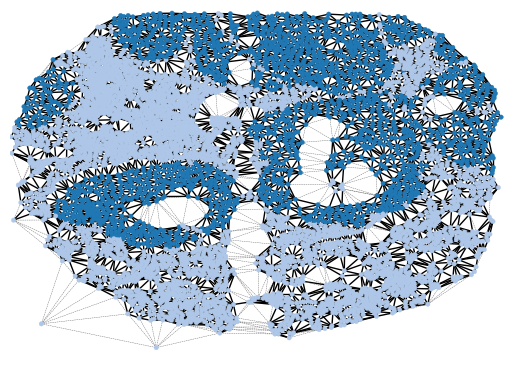

In [61]:
visualize_cell_graph(G)

# Create a Processor

In [19]:
from k2 import K2Processor

In [20]:
embeds_path = "/scr/biggest/gmachi/datasets/celldive_lung/embed_sample.obj"
celltype_path = "/scr/biggest/gmachi/datasets/celldive_lung/celltype_sample.obj"

In [22]:
proc_args = {"datatype":"cells",
        "k":20,
        "quantizer_type": "kmeans",
        "embeddings_path": embeds_path,
        "embeddings_type": "multidict",
        "mapping_path": None,
        "sample_size": 10160,
        "sample_scheme": "random",
        "dataset_path": None,
        "verbosity": "full",
        "so_dict_path": None,
        "mapping_path": celltype_path,
        "marker_flag": "types"}

Embeddings path provided, loading embeddings...
Chosen KMeans model for quantization...
total embeds: 10160
collapsing from dim 512 --> 2


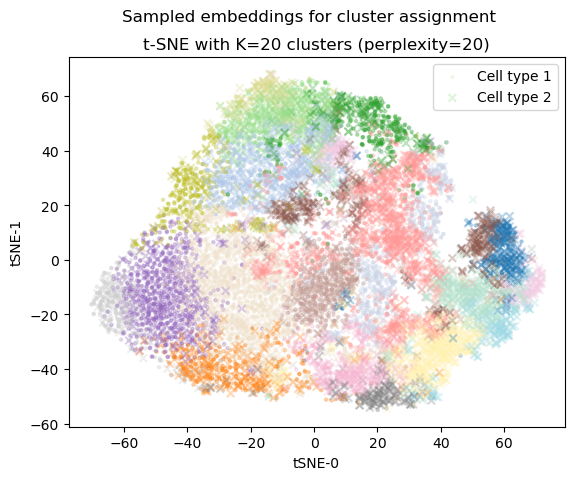

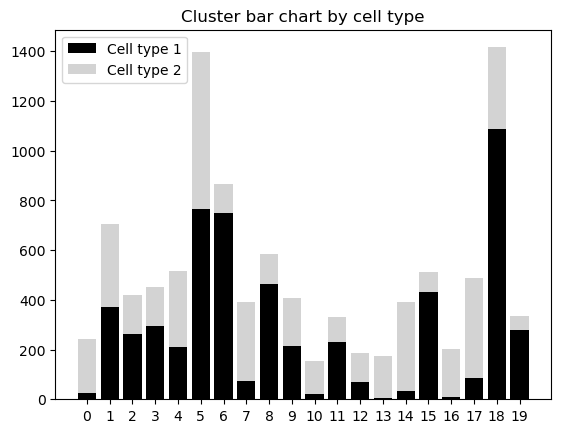

In [23]:
proc = K2Processor(proc_args)
proc.fit_quantizer()
proc.visualize_quantizer()

## Sprites

In [24]:
from utils import construct_sprite
S = construct_sprite(G, proc, key_in="emb", key_out="concept")

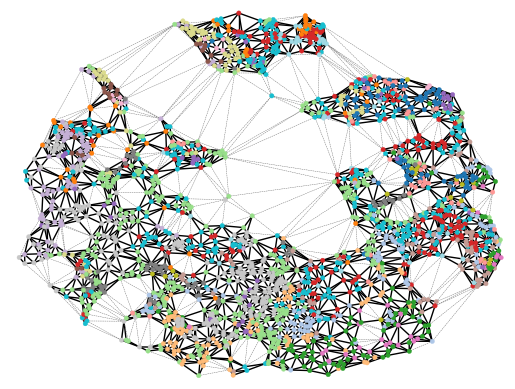

In [25]:
visualize_cell_graph(S, key="concept", node_colors=None)

# Train a prospector model

In [30]:
from k2 import K2Model

In [41]:
label_path = "/scr/biggest/gmachi/datasets/celldive_lung/processed/label_dict.obj"
label_dict = deserialize(label_path)

G_dir = "/scr/biggest/gmachi/datasets/celldive_lung/for_ml/for_prospect/"


In [47]:
hparams = {"alpha": 1e10, "tau": 0, "lambda": 0.5}
model_args = {"modality": "cells",
        "processor": proc,
        "r":1,
        "variant": "inferential",
        "hparams": hparams,
        "train_graph_path": G_dir,
        "train_label_dict": label_dict}

note: below cell takes 34min to run with 30gb ram

In [48]:
k2m = K2Model(model_args)


In [49]:
k2m.create_train_array()

In [ ]:
k2m.fit_kernel()

Differential Expression with alpha,tau: 0.01,1
[ 0.03 -0.06  0.03 -0.17 -0.05 -0.13 -0.04 -0.04  0.27  0.11 -0.11  0.02
 -0.01  0.   -0.02 -0.16 -0.1  -0.13  0.05 -0.11  0.1  -0.04 -0.13  0.15
 -0.08  0.    0.05 -0.06  0.11  0.28 -0.04 -0.05 -0.23  0.    0.1   0.01
 -0.1  -0.   -0.09 -0.   -0.08  0.24 -0.19 -0.07 -0.09 -0.01 -0.08  0.28
  0.41  0.17 -0.1   0.    0.16  0.01  0.16 -0.1   0.03  0.13 -0.1   0.05
 -0.71  0.24 -0.09  0.02  0.22  0.3  -0.01 -0.16  0.24  0.23  0.26  0.06
  0.    0.19  0.    0.13 -0.13 -0.19 -0.09 -0.26 -0.38 -0.06  0.13  0.08
 -0.14 -0.07  0.   -0.39  0.02  0.   -0.06 -0.12 -0.13  0.05 -0.03 -0.12
  0.04 -0.11  0.14  0.53  0.11 -0.04 -0.03 -0.31 -0.21 -0.14  0.   -0.24
  0.11  0.02 -0.18 -0.02 -0.06  0.   -0.02 -0.08  0.06 -0.12 -0.15 -0.03
 -0.24  0.01 -0.15 -0.05  0.06 -0.05  0.    0.25  0.06  0.09  0.    0.26
  0.01 -0.07  0.   -0.01  0.   -0.   -0.13 -0.05  0.19  0.14 -0.34  0.
 -0.05  0.06  0.04 -0.12 -0.15  0.02  0.06 -0.03  0.33  0.    0.23  0.23
 -0.16

In [ ]:
from utils import serialize_model
serialize_model(k2m, "k2model.obj")

### or deserialize a model

In [6]:
from utils import deserialize_model
k2m = deserialize_model("k2model.obj")

<BarContainer object of 230 artists>

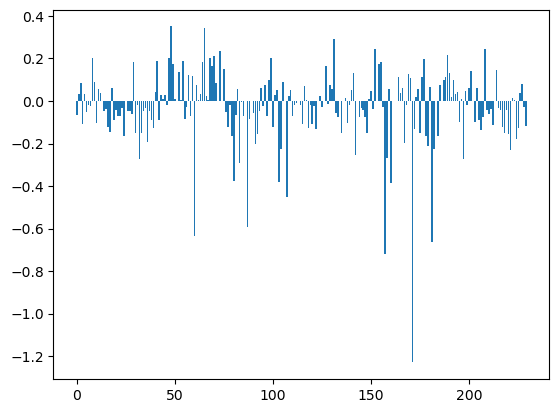

In [7]:
import matplotlib.pyplot as plt
plt.bar(x=range(len(k2m.B)), height=list(k2m.B))

In [62]:
P = k2m.prospect(G)

Displaying motif graph with log10 scaling


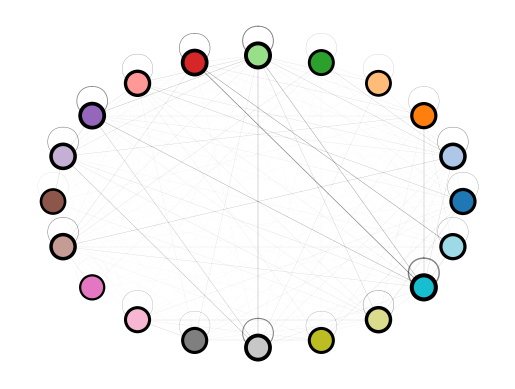

In [63]:
k2m.visualize_motif_graph(G)

No G provided, showing model-wide kernel hash-graph
Displaying motif graph with log2 scaling


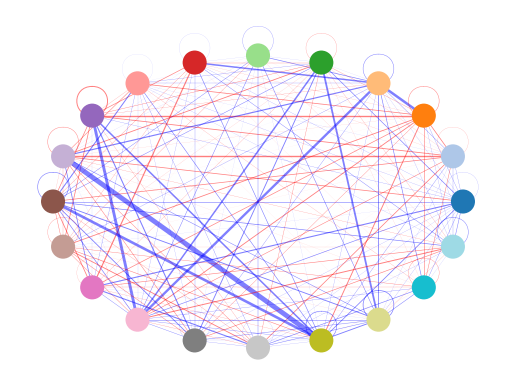

In [64]:
k2m.visualize_motif_graph()

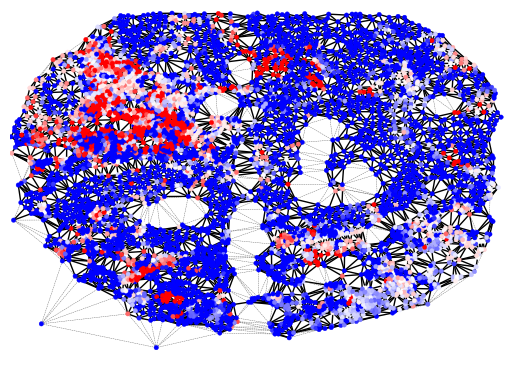

In [65]:
from utils import visualize_cell_graph
visualize_cell_graph(P, key="emb", prospect_flag=True)
# or in future: k2m.visualize_prospect_graph(P)

### Use run_gridsearch to get models trained

- check how many models are trained

In [3]:
import os
print(len(os.listdir("/scr/gmachi/prospection/K2/notebooks/spatial-bio/outputs/gridsearch_results/k2models")))

54
